In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenet
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.optimizers import Adam

In [2]:
# Load Fashion MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Preprocess data
x_train_full = x_train_full / 255.0  # Normalize to [0, 1]
x_test = x_test / 255.0
x_train_full = np.expand_dims(x_train_full, -1)  # Add channel dimension (grayscale)
x_test = np.expand_dims(x_test, -1)

In [4]:
# Convert labels to one-hot encoding
y_train_full = to_categorical(y_train_full, 10)
y_test = to_categorical(y_test, 10)

In [15]:
# Define LeNet-5 model
def create_lenet5():
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), padding='same'),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        AveragePooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [16]:
# 5-Fold Cross-Validation
def evaluate_lenet5(x_data, y_data, epochs=10, batch_size=64):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    histories = []
    fold_accuracies = []

    for train_idx, val_idx in kfold.split(x_data):
        x_train, x_val = x_data[train_idx], x_data[val_idx]
        y_train, y_val = y_data[train_idx], y_data[val_idx]

        model = create_lenet5()
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size, verbose=0)

        val_accuracy = model.evaluate(x_val, y_val, verbose=0)[1]
        fold_accuracies.append(val_accuracy)
        histories.append(history)

    return fold_accuracies, histories

In [17]:
# Train and evaluate LeNet-5
lenet_accuracies, lenet_histories = evaluate_lenet5(x_train_full, y_train_full, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


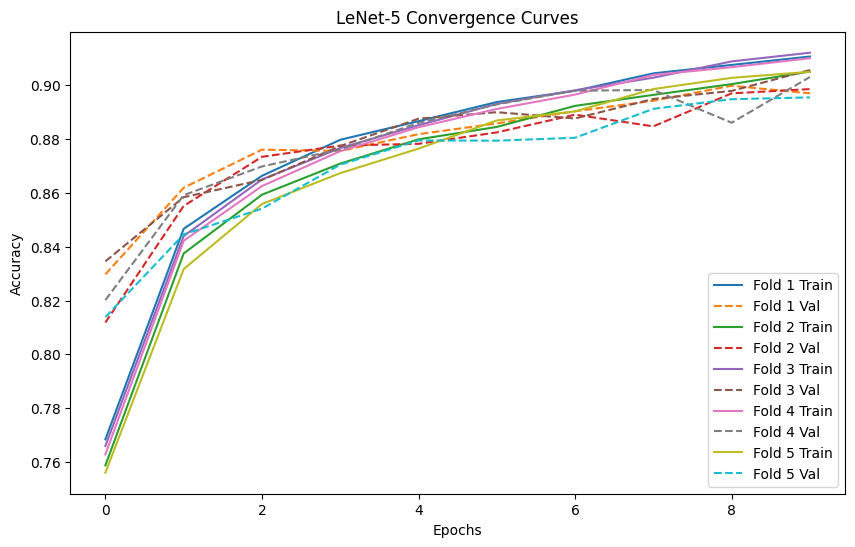

In [18]:
# Plot convergence curve for LeNet-5
plt.figure(figsize=(10, 6))
for i, history in enumerate(lenet_histories):
    plt.plot(history.history['accuracy'], label=f'Fold {i + 1} Train')
    plt.plot(history.history['val_accuracy'], label=f'Fold {i + 1} Val', linestyle='dashed')
plt.title('LeNet-5 Convergence Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# Transfer Learning Models
transfer_models = {
    'MobileNetV2': (MobileNetV2, preprocess_mobilenet),
    'ResNet50': (ResNet50, preprocess_resnet)
}

transfer_results = {}

In [21]:
import tensorflow as tf

Evaluating MobileNetV2...


<ipython-input-22-d12a3a03ce3f>:17: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = model_class(include_top=False, input_shape=(32, 32, 3))


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.2280 - loss: 2.2364 - val_accuracy: 0.4518 - val_loss: 2.0511
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4396 - loss: 2.0051 - val_accuracy: 0.4779 - val_loss: 1.8846
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4697 - loss: 1.8563 - val_accuracy: 0.4661 - val_loss: 1.7742
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4810 - loss: 1.7523 - val_accuracy: 0.5015 - val_loss: 1.6914
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4975 - loss: 1.6721 - val_accuracy: 0.5032 - val_loss: 1.6295
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5068 - loss: 1.6175 - val_accuracy: 0.5110 - val_loss: 1.5816
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5113 - loss: 1.5745 - val_accuracy: 0.5093 - val_loss: 1.5421
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5162 - loss: 1.5373 - val_accurac

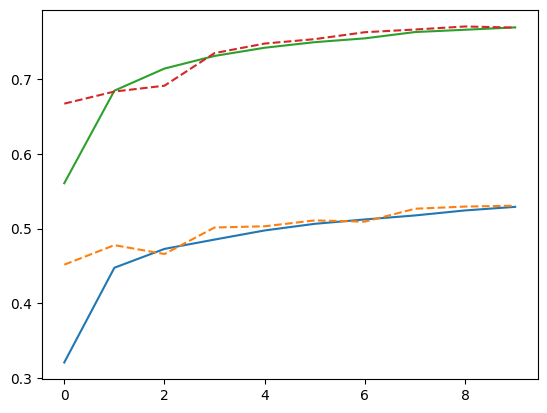

In [22]:
for model_name, (model_class, preprocess_func) in transfer_models.items():
    print(f"Evaluating {model_name}...")

    # Preprocess data for transfer learning
    x_train_tl = np.repeat(x_train_full, 3, axis=-1)  # Convert to RGB
    x_test_tl = np.repeat(x_test, 3, axis=-1)

    # Resize images to 32x32
    x_train_tl = tf.image.resize(x_train_tl, [32, 32]).numpy()
    x_test_tl = tf.image.resize(x_test_tl, [32, 32]).numpy()

    x_train_tl = preprocess_func(x_train_tl)
    x_test_tl = preprocess_func(x_test_tl)


    # Define transfer learning model
    base_model = model_class(include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False

    inputs = Input(shape=(32, 32, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(10, activation='softmax')(x)
    transfer_model = Model(inputs, outputs)

    transfer_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train and evaluate
    history = transfer_model.fit(x_train_tl, y_train_full, epochs=10, batch_size=64, verbose=1, validation_split=0.2)

    test_accuracy = transfer_model.evaluate(x_test_tl, y_test, verbose=0)[1]
    transfer_results[model_name] = (history, test_accuracy)

    # Plot convergence curve
    plt.plot(history.history['accuracy'], label=f'{model_name} Train')
    plt.plot(history.history['val_accuracy'], label=f'{model_name} Val', linestyle='dashed')

In [24]:
# Summary of results
print("\nResults Summary:")
print(f"LeNet-5 Mean Validation Accuracy: {np.mean(lenet_accuracies):.4f}")
for model_name, (history, test_accuracy) in transfer_results.items():
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")



Results Summary:
LeNet-5 Mean Validation Accuracy: 0.9000
MobileNetV2 Test Accuracy: 0.5219
ResNet50 Test Accuracy: 0.7627
